In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d mlg-ulb/creditcardfraud
# !unzip creditcardfraud.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CC Fraud Detection/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
df['Class'].value_counts() # Imbalanced dataset

0    284315
1       492
Name: Class, dtype: int64

In [16]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<Axes: >

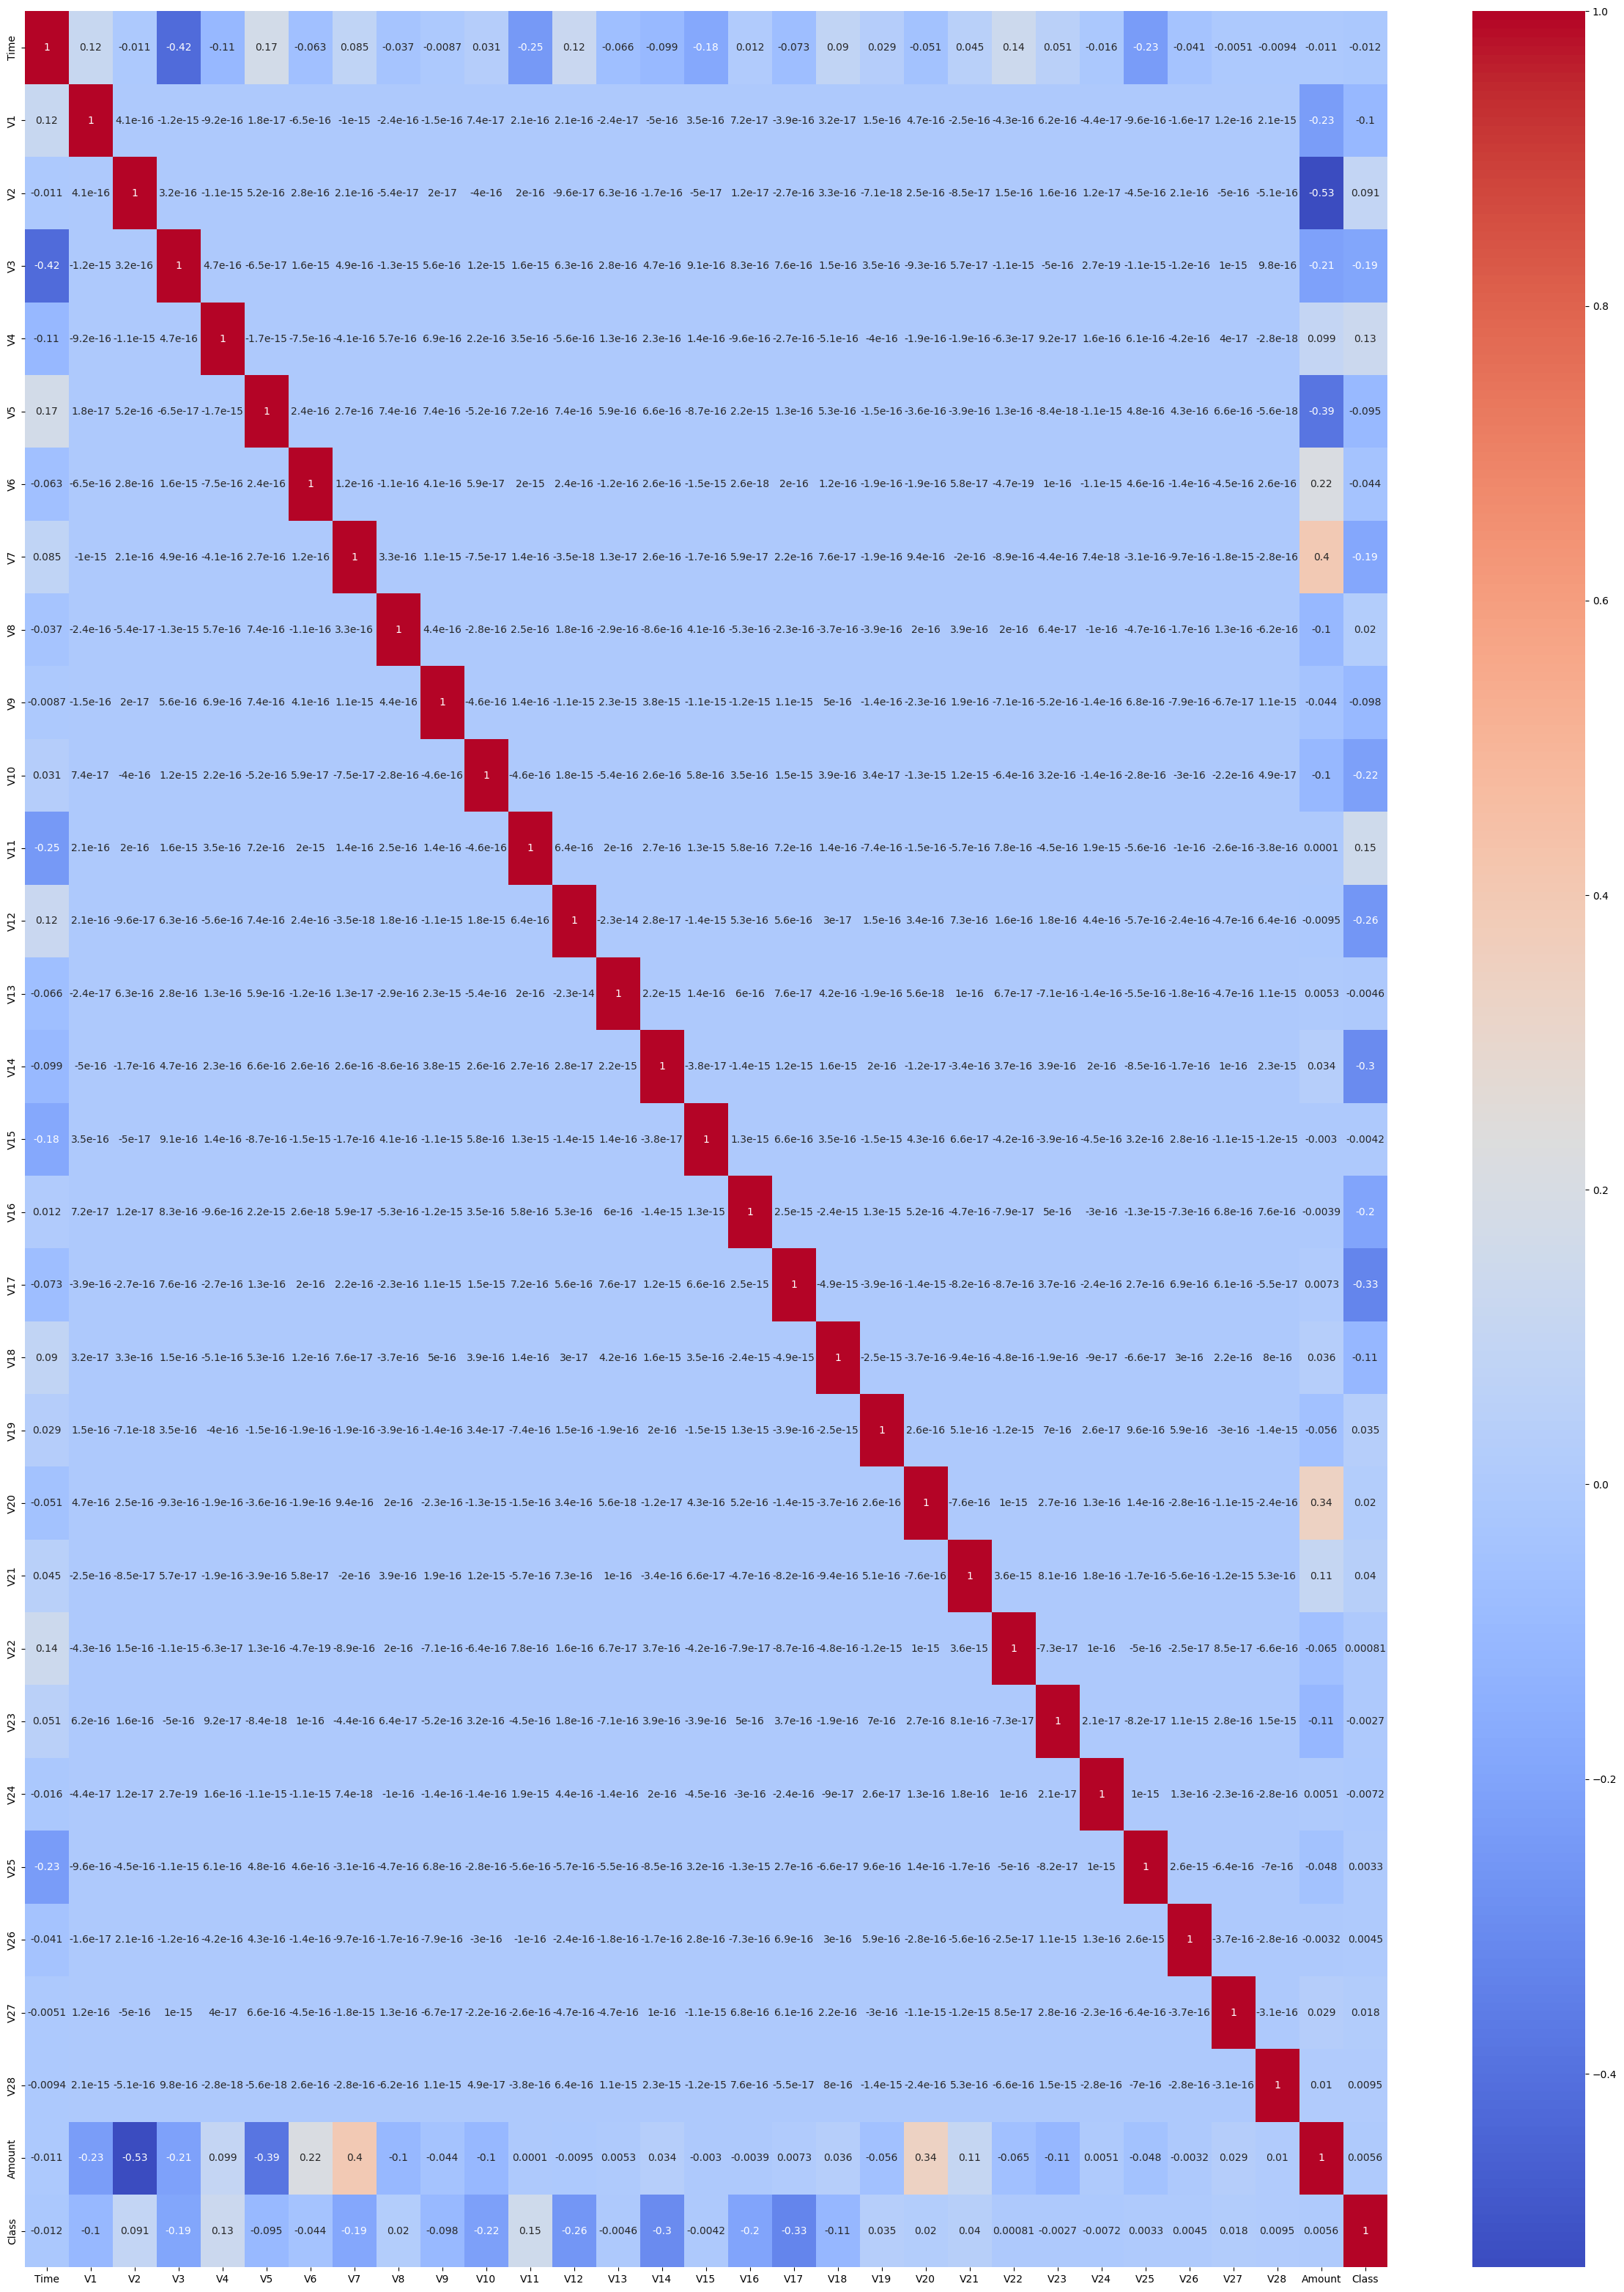

In [59]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

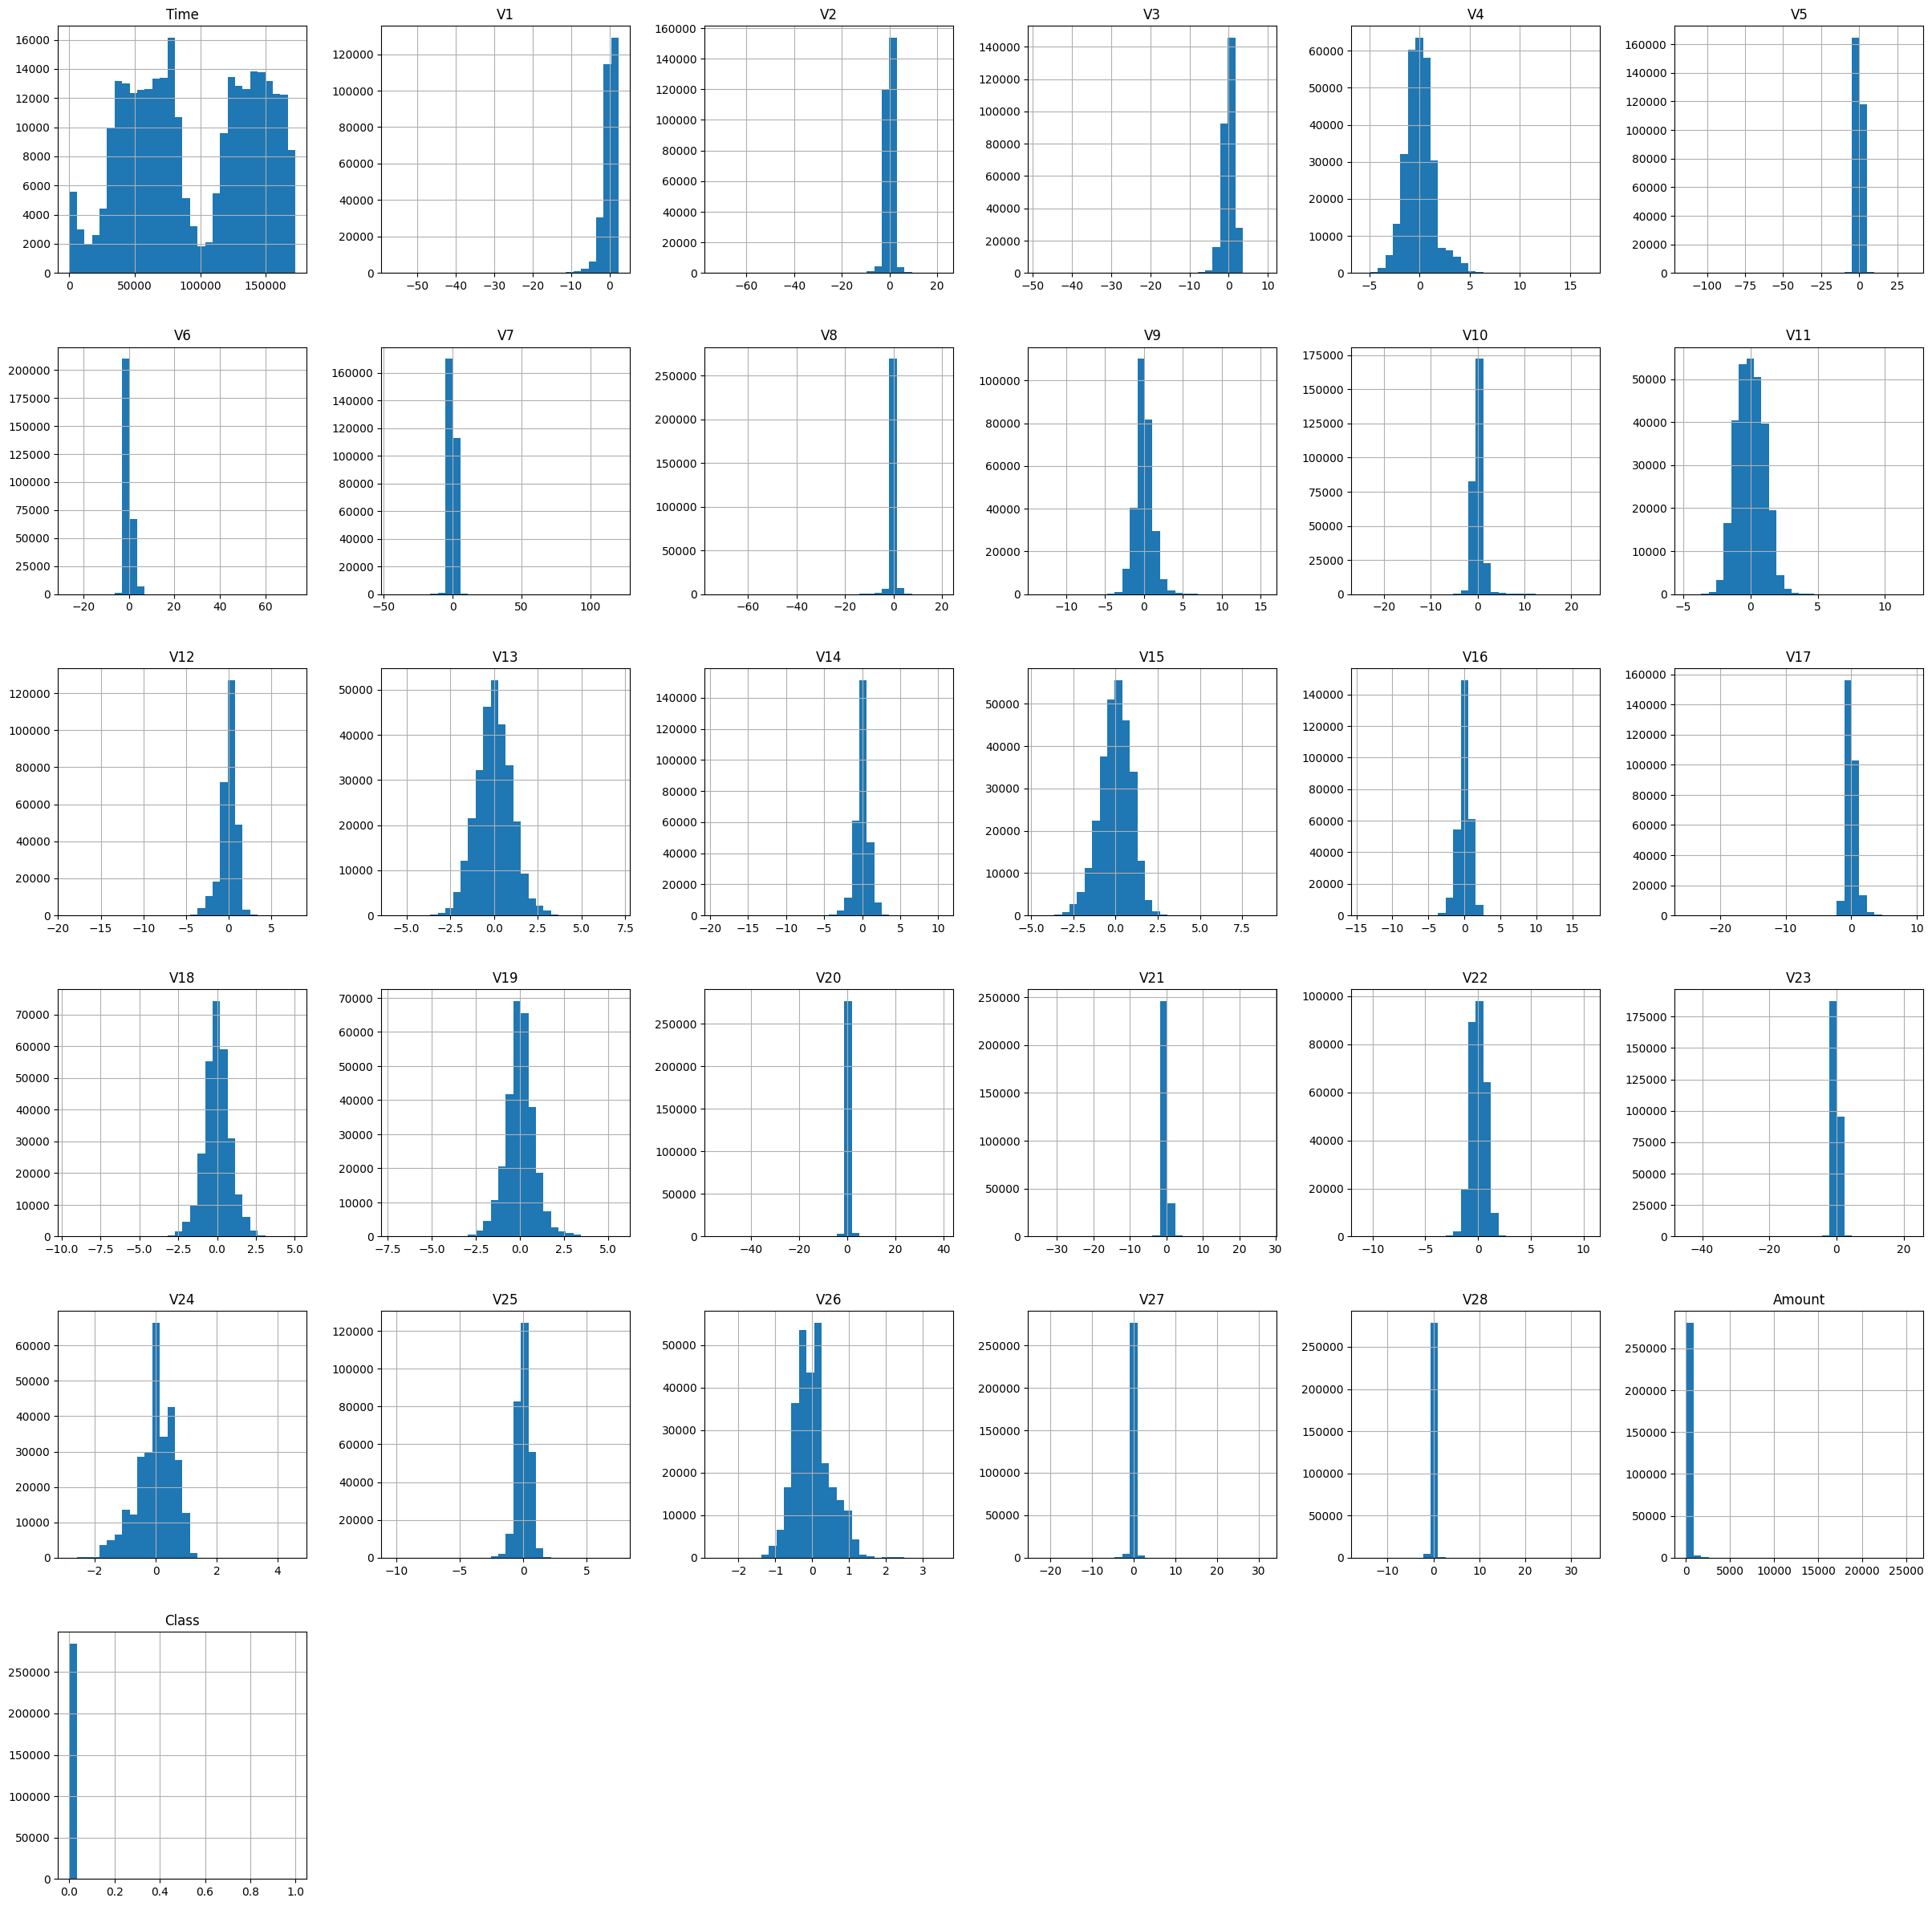

In [17]:
df.hist(bins=30, figsize=(30, 30));

<ipython-input-18-33e575a33766>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-18-33e575a33766>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


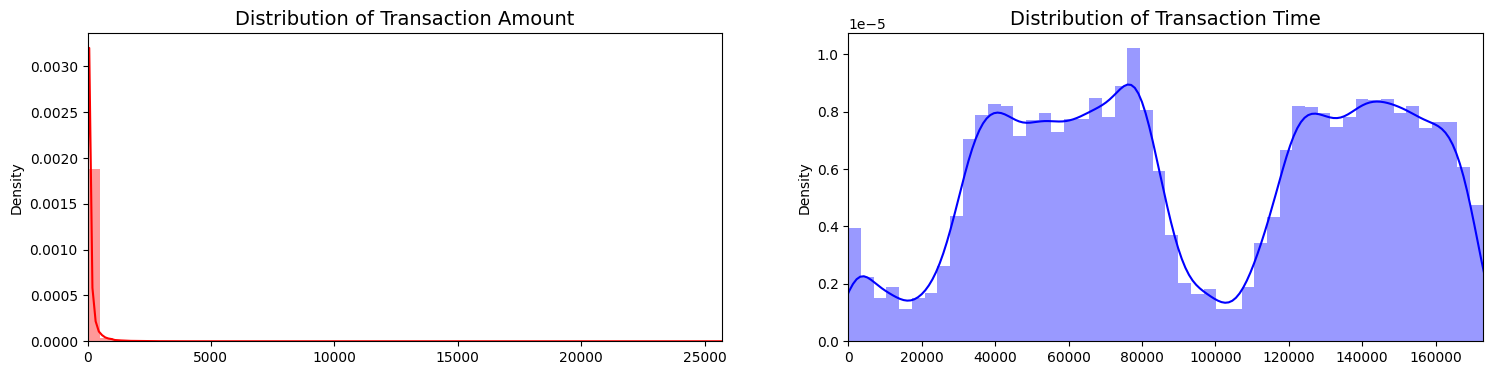

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show();

In [19]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

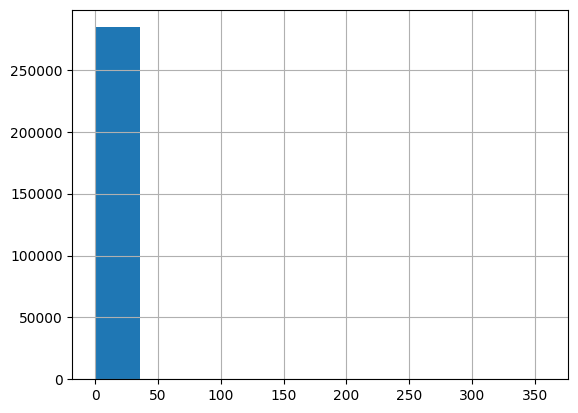

In [20]:
# Pre processing
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
new_df['Amount'].hist()

In [21]:
new_df['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [22]:
# Available in Sklearn min-max normalization
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())

In [23]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [24]:
new_df = new_df.sample(frac=1, random_state=42)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,0.240202,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,4.781527,1
49906,0.256152,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
29474,0.205357,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
276481,0.967192,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
278846,0.975005,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.437624,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.279746,0
259178,0.920181,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.939426,0
131932,0.461798,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.252358,0
146867,0.508884,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.293440,0


In [25]:
from sklearn.model_selection import train_test_split
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

# train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
# train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

In [26]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((170884, 30), (170884,), (56961, 30), (56961,), (56962, 30), (56962,))

In [27]:
y_train.value_counts(), y_test.value_counts(), y_val.value_counts()

(0    170595
 1       289
 Name: Class, dtype: int64,
 0    56856
 1      105
 Name: Class, dtype: int64,
 0    56864
 1       98
 Name: Class, dtype: int64)

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991982865569626

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.88      0.64      0.74        98

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Verify hight scores in Not Fraud categorie, this is normal because we have very hight change to get into a Not Fraud state </br>
print("0") gets the same result</br>
But in the Fraud we have very low scores due to the imbalanced dataset</br>
**Note:** The F1 score is a measure of a model's accuracy that considers both precision and recall. It is the harmonic mean of precision and recall, with values ranging from 0 to 1. A high F1 score indicates that a model has both high precision and high recall, which means that it is good at identifying true positives and avoiding false positives and false negatives.Where precision is the number of true positives divided by the number of true positives plus false positives, and recall is the number of true positives divided by the number of true positives plus false negatives.

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________


In [32]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
5341/5341 [==============================] - 32s 5ms/step - loss: 0.0689 - accuracy: 0.9886 - val_loss: 0.0054 - val_accuracy: 0.9995
Epoch 2/5
5341/5341 [==============================] - 26s 5ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0065 - val_accuracy: 0.9995
Epoch 3/5
5341/5341 [==============================] - 26s 5ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0065 - val_accuracy: 0.9995
Epoch 4/5
5341/5341 [==============================] - 26s 5ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0072 - val_accuracy: 0.9994
Epoch 5/5
5341/5341 [==============================] - 26s 5ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9995


In [33]:
def neural_net_predictions(model, x_train):
  return (shallow_nn.predict(x_train).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_train)

5341/5341 [==============================] - 9s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

1781/1781 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.89      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.86      0.55      0.67        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.86      0.73      0.79        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(0    284315
 Name: Class, dtype: int64,
 1    492
 Name: Class, dtype: int64)

In [40]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [41]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
248233,0.890365,-0.385556,1.350800,1.943284,4.348705,0.904348,1.980317,0.664322,-0.015433,-1.482944,...,0.009935,0.514795,-0.562538,0.163291,0.642322,0.673732,-0.171536,-0.141777,0.240341,0
128479,0.455606,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,0.530986,1
86155,0.353651,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,-0.100523,...,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1.110878,1
98103,0.384972,-3.014645,0.987896,0.304238,0.354010,-0.843555,-0.737184,0.171922,0.565525,0.259202,...,-0.187817,-0.301740,-0.106044,0.450571,0.015101,0.124491,-0.872735,-0.500794,-0.155942,0
44346,0.242534,-4.035057,-3.393574,0.733396,-0.643994,2.865949,-3.489395,-1.278488,0.364726,0.357596,...,0.471235,-0.047274,-0.520309,0.504304,0.977133,-0.671151,0.016441,-0.671971,-0.293440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180719,0.721498,-3.522724,-1.157664,-0.794284,-2.805794,1.940904,4.463132,-0.530524,-2.387878,0.369244,...,2.133195,0.407078,0.595225,0.753027,0.224439,-0.146448,-1.149233,0.538817,1.495144,0
15781,0.157525,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1.089779,1
112728,0.421194,-0.824663,-0.133017,2.781831,-1.176036,-1.358261,-0.213095,-0.134471,0.148357,-0.950320,...,-0.048094,0.115225,-0.059280,0.370968,0.108868,0.492906,0.024191,0.082105,0.903933,0
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1


In [45]:
X = balanced_df.drop("Class", axis=1)
y = balanced_df["Class"]

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.4)

x_test_b, x_val_b, y_test_b, y_val_b = train_test_split(x_test_b, y_test_b, test_size=0.5)

In [46]:
y_train_b.value_counts(), y_test_b.value_counts(), y_val_b.value_counts()

(1    295
 0    295
 Name: Class, dtype: int64,
 0    103
 1     94
 Name: Class, dtype: int64,
 1    103
 0     94
 Name: Class, dtype: int64)

In [47]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.86      0.94      0.90        94
       Fraud       0.94      0.86      0.90       103

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



In [48]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
19/19 [==============================] - 5s 74ms/step - loss: 1.0505 - accuracy: 0.4661 - val_loss: 0.7804 - val_accuracy: 0.7310
Epoch 2/40
19/19 [==============================] - 1s 43ms/step - loss: 1.0167 - accuracy: 0.4322 - val_loss: 0.7681 - val_accuracy: 0.7310
Epoch 3/40
19/19 [==============================] - 1s 42ms/step - loss: 0.9813 - accuracy: 0.4525 - val_loss: 0.7571 - val_accuracy: 0.7310
Epoch 4/40
19/19 [==============================] - 1s 43ms/step - loss: 0.9442 - accuracy: 0.4864 - val_loss: 0.7451 - val_accuracy: 0.7411
Epoch 5/40
19/19 [==============================] - 1s 42ms/step - loss: 0.9054 - accuracy: 0.5831 - val_loss: 0.7351 - val_accuracy: 0.7411
Epoch 6/40
19/19 [==============================] - 1s 43ms/step - loss: 0.8845 - accuracy: 0.5864 - val_loss: 0.7239 - val_accuracy: 0.7411
Epoch 7/40
19/19 [==============================] - 1s 41ms/step - loss: 0.8100 - accuracy: 0.6373 - val_loss: 0.7100 - val_accuracy: 0.7360
Epoch 8/40
19

In [49]:
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
19/19 [==============================] - 1s 61ms/step - loss: 0.2934 - accuracy: 0.8864 - val_loss: 0.3494 - val_accuracy: 0.8528
Epoch 2/40
19/19 [==============================] - 1s 42ms/step - loss: 0.2917 - accuracy: 0.8881 - val_loss: 0.3449 - val_accuracy: 0.8579
Epoch 3/40
19/19 [==============================] - 1s 42ms/step - loss: 0.2889 - accuracy: 0.8932 - val_loss: 0.3393 - val_accuracy: 0.8579
Epoch 4/40
19/19 [==============================] - 1s 41ms/step - loss: 0.2755 - accuracy: 0.8831 - val_loss: 0.3355 - val_accuracy: 0.8579
Epoch 5/40
19/19 [==============================] - 1s 42ms/step - loss: 0.2801 - accuracy: 0.8898 - val_loss: 0.3316 - val_accuracy: 0.8579
Epoch 6/40
19/19 [==============================] - 1s 42ms/step - loss: 0.2784 - accuracy: 0.8915 - val_loss: 0.3269 - val_accuracy: 0.8579
Epoch 7/40
19/19 [==============================] - 1s 45ms/step - loss: 0.2712 - accuracy: 0.8898 - val_loss: 0.3210 - val_accuracy: 0.8629
Epoch 8/40
19

In [50]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.80      1.00      0.89        94
       Fraud       1.00      0.77      0.87       103

    accuracy                           0.88       197
   macro avg       0.90      0.88      0.88       197
weighted avg       0.90      0.88      0.88       197



In [51]:
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape[1],)))
shallow_nn_b1.add(Dense(1, 'relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b1', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
19/19 [==============================] - 2s 52ms/step - loss: 0.8401 - accuracy: 0.4458 - val_loss: 0.7776 - val_accuracy: 0.5025
Epoch 2/40
19/19 [==============================] - 1s 42ms/step - loss: 0.7501 - accuracy: 0.5525 - val_loss: 0.6906 - val_accuracy: 0.6244
Epoch 3/40
19/19 [==============================] - 1s 42ms/step - loss: 0.6825 - accuracy: 0.6000 - val_loss: 0.6716 - val_accuracy: 0.6294
Epoch 4/40
19/19 [==============================] - 1s 48ms/step - loss: 0.6518 - accuracy: 0.6593 - val_loss: 0.6655 - val_accuracy: 0.6447
Epoch 5/40
19/19 [==============================] - 1s 62ms/step - loss: 0.6440 - accuracy: 0.6661 - val_loss: 0.6614 - val_accuracy: 0.6396
Epoch 6/40
19/19 [==============================] - 1s 65ms/step - loss: 0.6316 - accuracy: 0.6695 - val_loss: 0.6579 - val_accuracy: 0.6396
Epoch 7/40
19/19 [==============================] - 1s 57ms/step - loss: 0.6248 - accuracy: 0.6831 - val_loss: 0.6541 - val_accuracy: 0.6396
Epoch 8/40
19

In [52]:
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
19/19 [==============================] - 1s 43ms/step - loss: 0.4188 - accuracy: 0.8508 - val_loss: 0.4643 - val_accuracy: 0.8223
Epoch 2/40
19/19 [==============================] - 1s 41ms/step - loss: 0.4083 - accuracy: 0.8508 - val_loss: 0.4560 - val_accuracy: 0.8223
Epoch 3/40
19/19 [==============================] - 1s 41ms/step - loss: 0.3945 - accuracy: 0.8559 - val_loss: 0.4473 - val_accuracy: 0.8274
Epoch 4/40
19/19 [==============================] - 1s 46ms/step - loss: 0.3892 - accuracy: 0.8593 - val_loss: 0.4384 - val_accuracy: 0.8274
Epoch 5/40
19/19 [==============================] - 1s 62ms/step - loss: 0.3759 - accuracy: 0.8610 - val_loss: 0.4301 - val_accuracy: 0.8325
Epoch 6/40
19/19 [==============================] - 1s 60ms/step - loss: 0.3630 - accuracy: 0.8729 - val_loss: 0.4202 - val_accuracy: 0.8376
Epoch 7/40
19/19 [==============================] - 1s 73ms/step - loss: 0.3591 - accuracy: 0.8695 - val_loss: 0.4098 - val_accuracy: 0.8426
Epoch 8/40
19

In [53]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.80      1.00      0.89        94
       Fraud       1.00      0.77      0.87       103

    accuracy                           0.88       197
   macro avg       0.90      0.88      0.88       197
weighted avg       0.90      0.88      0.88       197



In [54]:
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.64      1.00      0.78        94
       Fraud       1.00      0.49      0.65       103

    accuracy                           0.73       197
   macro avg       0.82      0.74      0.72       197
weighted avg       0.83      0.73      0.71       197



In [55]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.73      1.00      0.84        94
       Fraud       1.00      0.66      0.80       103

    accuracy                           0.82       197
   macro avg       0.86      0.83      0.82       197
weighted avg       0.87      0.82      0.82       197



In [56]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.80      1.00      0.89        94
       Fraud       1.00      0.78      0.87       103

    accuracy                           0.88       197
   macro avg       0.90      0.89      0.88       197
weighted avg       0.91      0.88      0.88       197



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.80      1.00      0.89        94
       Fraud       1.00      0.78      0.87       103

    accuracy                           0.88       197
   macro avg       0.90      0.89      0.88       197
weighted avg       0.91      0.88      0.88       197



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [58]:
print(classification_report(y_test_b, neural_net_predictions(shallow_nn_b, x_test_b), target_names=['Not Fraud', 'Fraud']))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.83      1.00      0.91       103
       Fraud       1.00      0.78      0.87        94

    accuracy                           0.89       197
   macro avg       0.92      0.89      0.89       197
weighted avg       0.91      0.89      0.89       197

